In [89]:
############ Load Data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Get data
train = pd.read_csv("data/train.csv")
print("train : " + str(train.shape))
test = pd.read_csv("data/test.csv")
print("test : " + str(test.shape))

#X_back_train, X_back_validate, Y_back_train, Y_back_validate = train_test_split(train[:-1], train['SalePrice'], test_size=0.2, random_state=1)



train : (1460, 81)
test : (1459, 80)


In [90]:
### Categorical vs Numeric Columns

numer = [col for col in test.columns if test.dtypes[col] != 'object']
cat = [col for col in test.columns if test.dtypes[col] == 'object']

print("Numeric Cols \n")
print(numer)
print("Number of Numeric Cols %i: " %len(numer))
print("Categorical Cols \n")
print(cat)
print("Number of Categorical Cols %i: " %len(cat))

Numeric Cols 

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Number of Numeric Cols 37: 
Categorical Cols 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', '

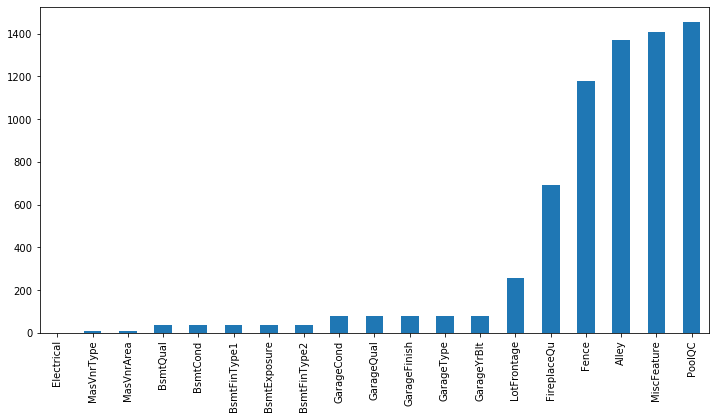

In [91]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

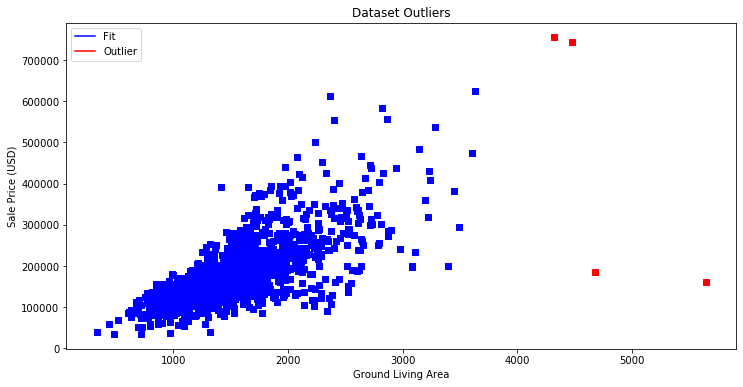

In [92]:
# Alley
# Lot Frontage
# GarageYrBlt
# GarageType
# GarageFinish

############ Outliers
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import from_levels_and_colors
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

line = np.linspace(0,10.1)

col = np.where(train.GrLivArea<4000, 'b','r')
leg_lines = [Line2D([0],[0], color = 'b'), Line2D([0],[0],color='r')]

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.scatter(train.GrLivArea, train.SalePrice, c = col, marker = "s")
plt.title("Dataset Outliers")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price (USD)")
ax.legend(leg_lines, ['Fit', 'Outlier'],loc=2)
plt.show()


/home/matt/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimension

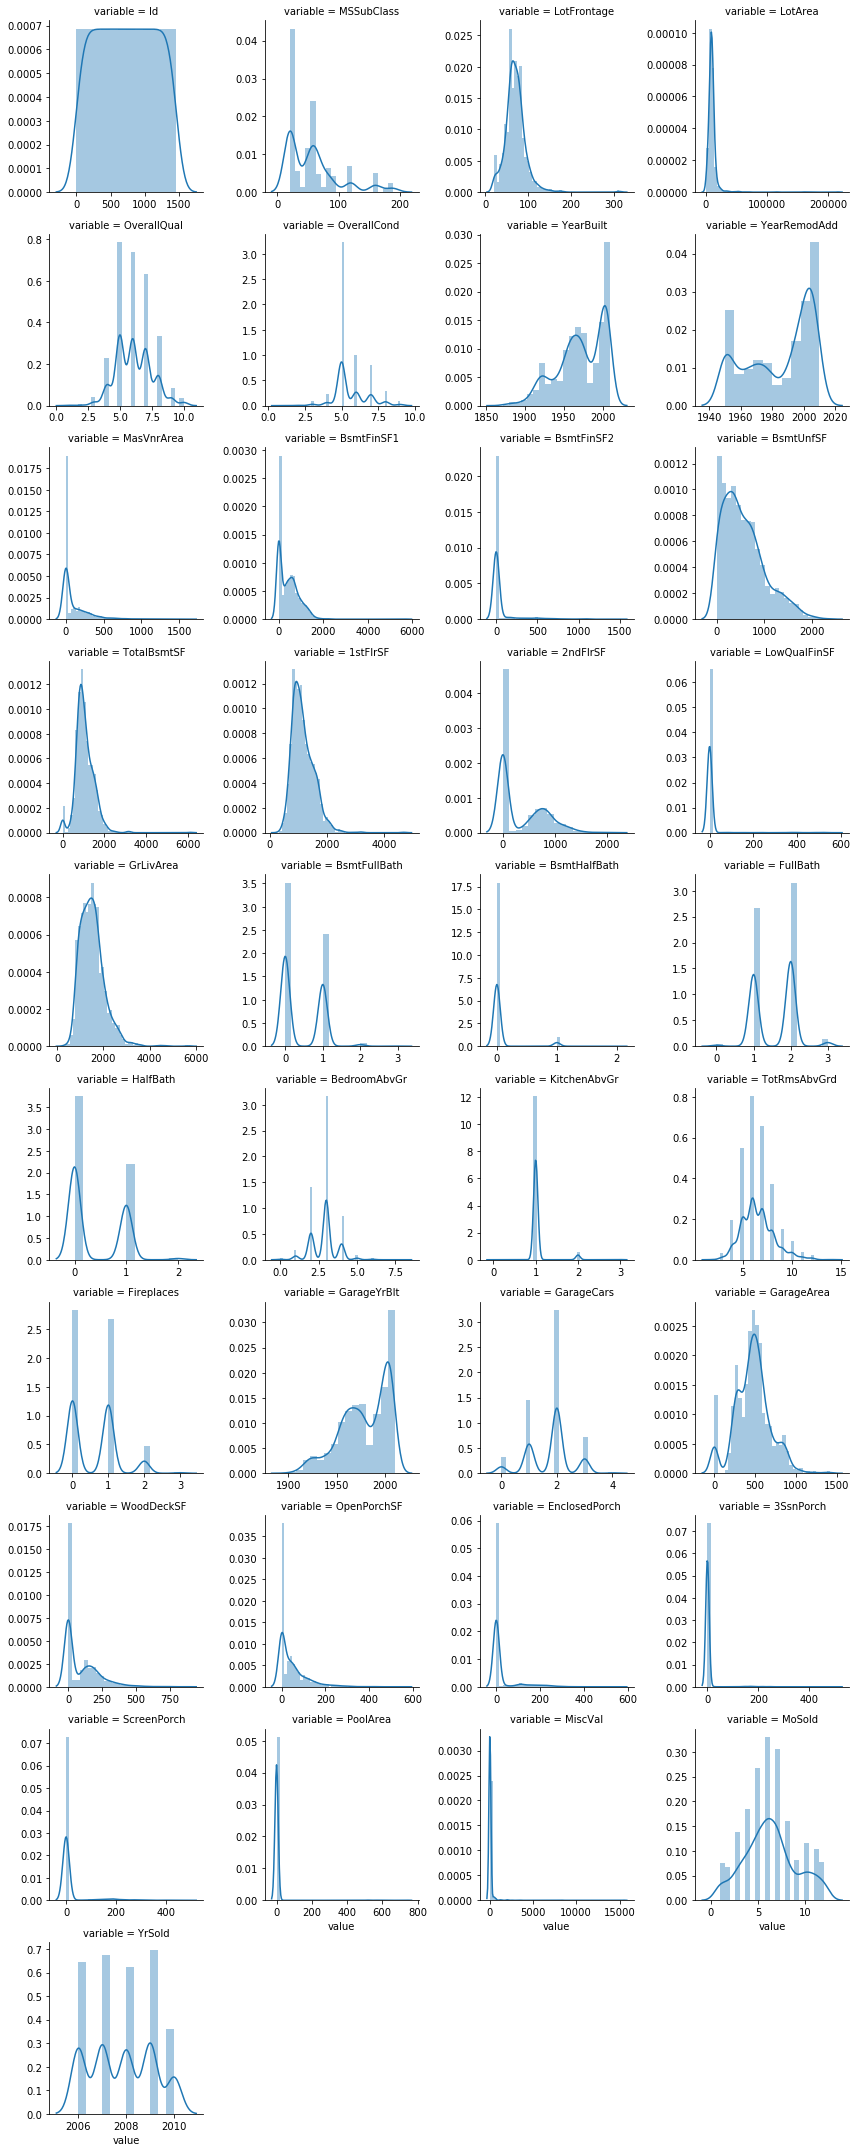

In [19]:
f = pd.melt(train, value_vars=numer)
grid = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.distplot, "value")

In [64]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/matt/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/matt/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/matt/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


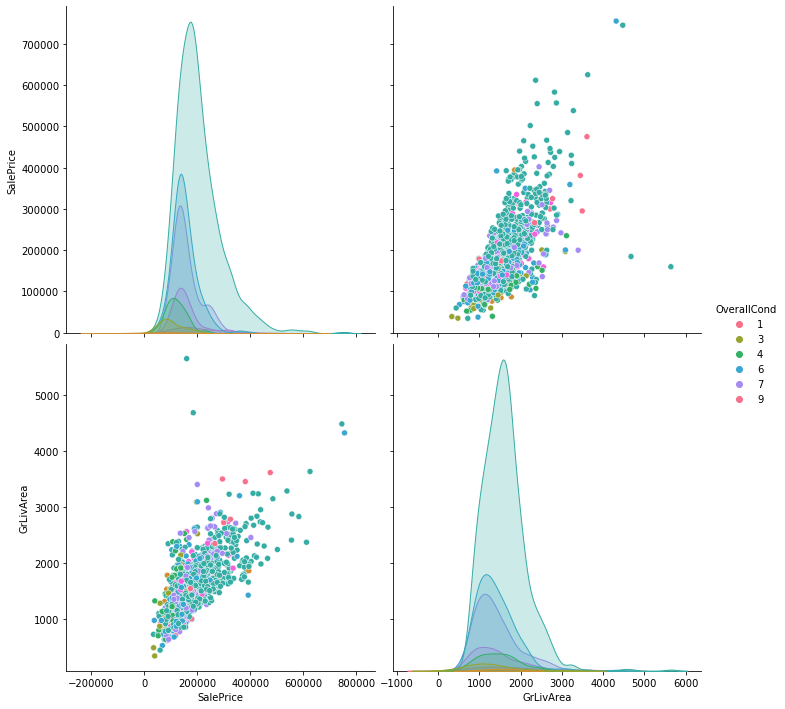

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [93]:
def compare(df):
    #snsplot = sns.stripplot(y=df.SalePrice, x=df.GrLivArea,
    #                        data=df,
    #                        jitter=True,
    #                        marker='o',
    #                        alpha=0.7,
    #                        hue="YrSold")
    snsplot = sns.pairplot(df[['SalePrice', 'GrLivArea','OverallCond']], hue='OverallCond', palette='husl', size=5);

    #snsplot.axes.set_title(
    #    'Distributions of SalesPrices  Living Area', fontsize=16)
    #snsplot.set_xlabel('Living Area', fontsize=14)
    #snsplot.set_ylabel('Sale Price', fontsize=14)
    #snsplot.tick_params(labelsize=16)
    #fig = snsplot.get_figure()
    
    fig.set_size_inches(8, 10)
    
    plt.show()

compare(train)
print(train.SalePrice)

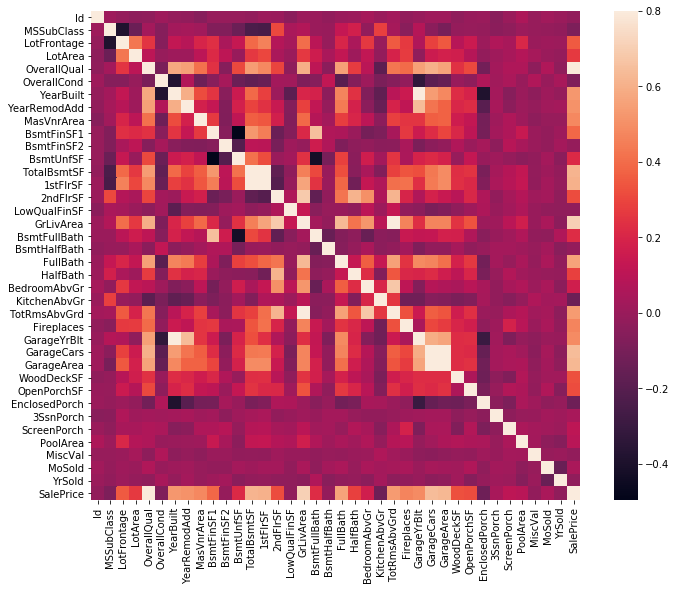

In [94]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True);

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


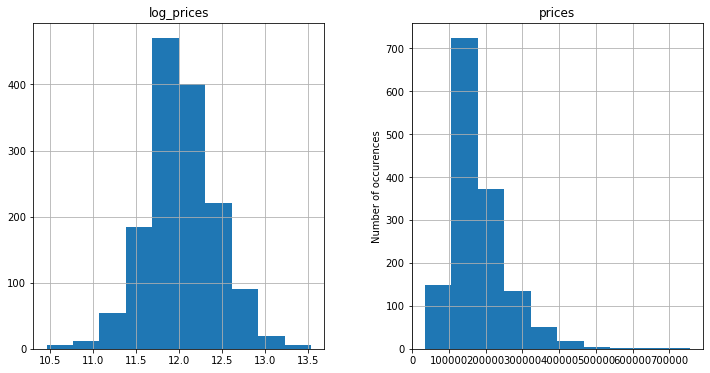

In [95]:
# Increases the size of the histogram to fit both normalized and raw data
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({'log_prices':np.log1p(train["SalePrice"]), 'prices': train["SalePrice"]})
prices.hist()
plt.ylabel('Number of occurences')
print(train.SalePrice)

In [30]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [82]:
x = data.columns
for el in x:
    print(el)

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition


In [97]:
neighborhood_name = data.groupby('Neighborhood')
neighborhood_name.head(5)
# Alley
# Lot Frontage
# GarageYrBlt
# GarageType
# GarageFinish
names = neighborhood_name.groups.keys()
neighborhood_avg = data.groupby('Neighborhood').mean()

neighb_impute = np.array(['LotFrontage', 'GarageYrBlt'])

#cl1['value'] = cl1.groupby('sec')['value'].transform(lambda x: x.fillna(x.mean()))

for el in neighb_impute:
        data[neighb_impute] = data.groupby('Neighborhood')[neighb_impute].transform(lambda x: x.fillna(x.mean()))
        
# for el in neibh_impute:
#     for n in 
#     data['el'].fillna()

In [73]:
#from scipy.stats import skew
#from scipy.stats.stats import pearsonr

#train['SalePrice'] = np.log1p(train['SalePrice'])

#log transform skewed numeric features:
#skewed_feats = train[numer].apply(lambda x: skew(x.dropna())) #compute skewness
#print(skewed_feats.loc[skewed_feats.values > 0.75])
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

#data[skewed_feats] = np.log1p(data[skewed_feats])

#train.shape, test.shape
#print(train.SalePrice)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64


In [98]:
print("NAs for features in train : " + str(data.isnull().values.sum()))
data = pd.get_dummies(data)
data = data.fillna(data.mean())
print("Remaining NAs for features in train : " + str(data.isnull().values.sum()))
print(train.SalePrice)

NAs for features in train : 13320
Remaining NAs for features in train : 0
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [99]:
#creating matrices for sklearn:
X_train = data[:train.shape[0]]
X_test = data[train.shape[0]:]
y = train.SalePrice

In [105]:
#sklearn.metrics.mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(X_train, y)

y_pred = reg.predict(X_train)
mean_squared_error(y, y_pred)

420902975.69087535

Text(0, 0.5, 'rmse')

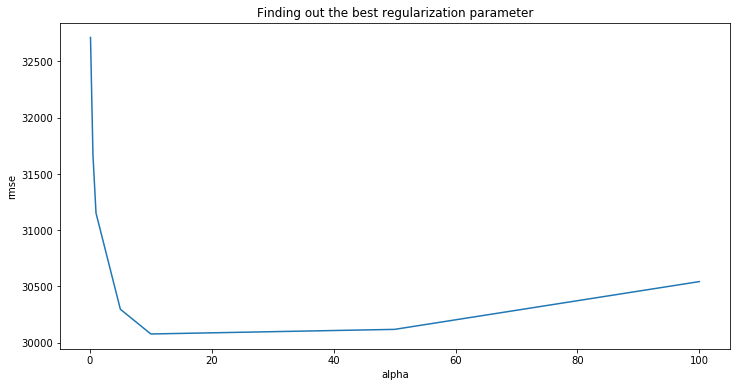

In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 10))
    return(rmse)

alphas = [0.1, 0.5, 1, 5, 10, 50, 100]
ridge_model = Ridge()

cv_ridge_train = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

# Plotting the least mean square error on the training data
cv_ridge_train = pd.Series(cv_ridge_train, index = alphas)
cv_ridge_train.plot(title = "Finding out the best regularization parameter")
#cv_ridge_test = pd.Series(cv_ridge_test, index = alphas)
#cv_ridge_test.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
from sklearn.linear_model import Lasso



In [9]:
############ Encode Categorical Data
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

In [16]:
############ Combine Data
# keep ID for submission
train_ID = train['Id']
test_ID = test['Id']

# split data for training
y_train = train['SalePrice']
X_train = train.drop(['Id','SalePrice'], axis=1)
X_test = test.drop('Id', axis=1)

all_feats = pd.concat([X_train, X_test])

incomplete_cols = list(all_feats.columns[all_feats.isnull().any()])
print(incomplete_cols)
#IMPUTE MED print(all_feats['BsmtFinSF1'])
#DROP print(all_feats['BsmtFinSF2'])
#IMPUTE MED print(all_feats['BsmtUnfSF'])

### Neighborhood
#Lot Frontage
#Garage YEar Built

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [17]:
############ Boxplot
from matplotlib.patches import Polygon

#fix, ax1 = plt.subplots()
#ax1.set_title('plot')
#ax1.boxplot(all_feats['LotFrontage'].tolist())

incomplete_data = pd.DataFrame(columns=incomplete_cols)

for i in range(len(incomplete_cols)):
    incomplete_data[incomplete_cols[i]] = all_feats[incomplete_cols[i]].tolist()
    
incomplete_data

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
2915,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
2916,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
2917,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


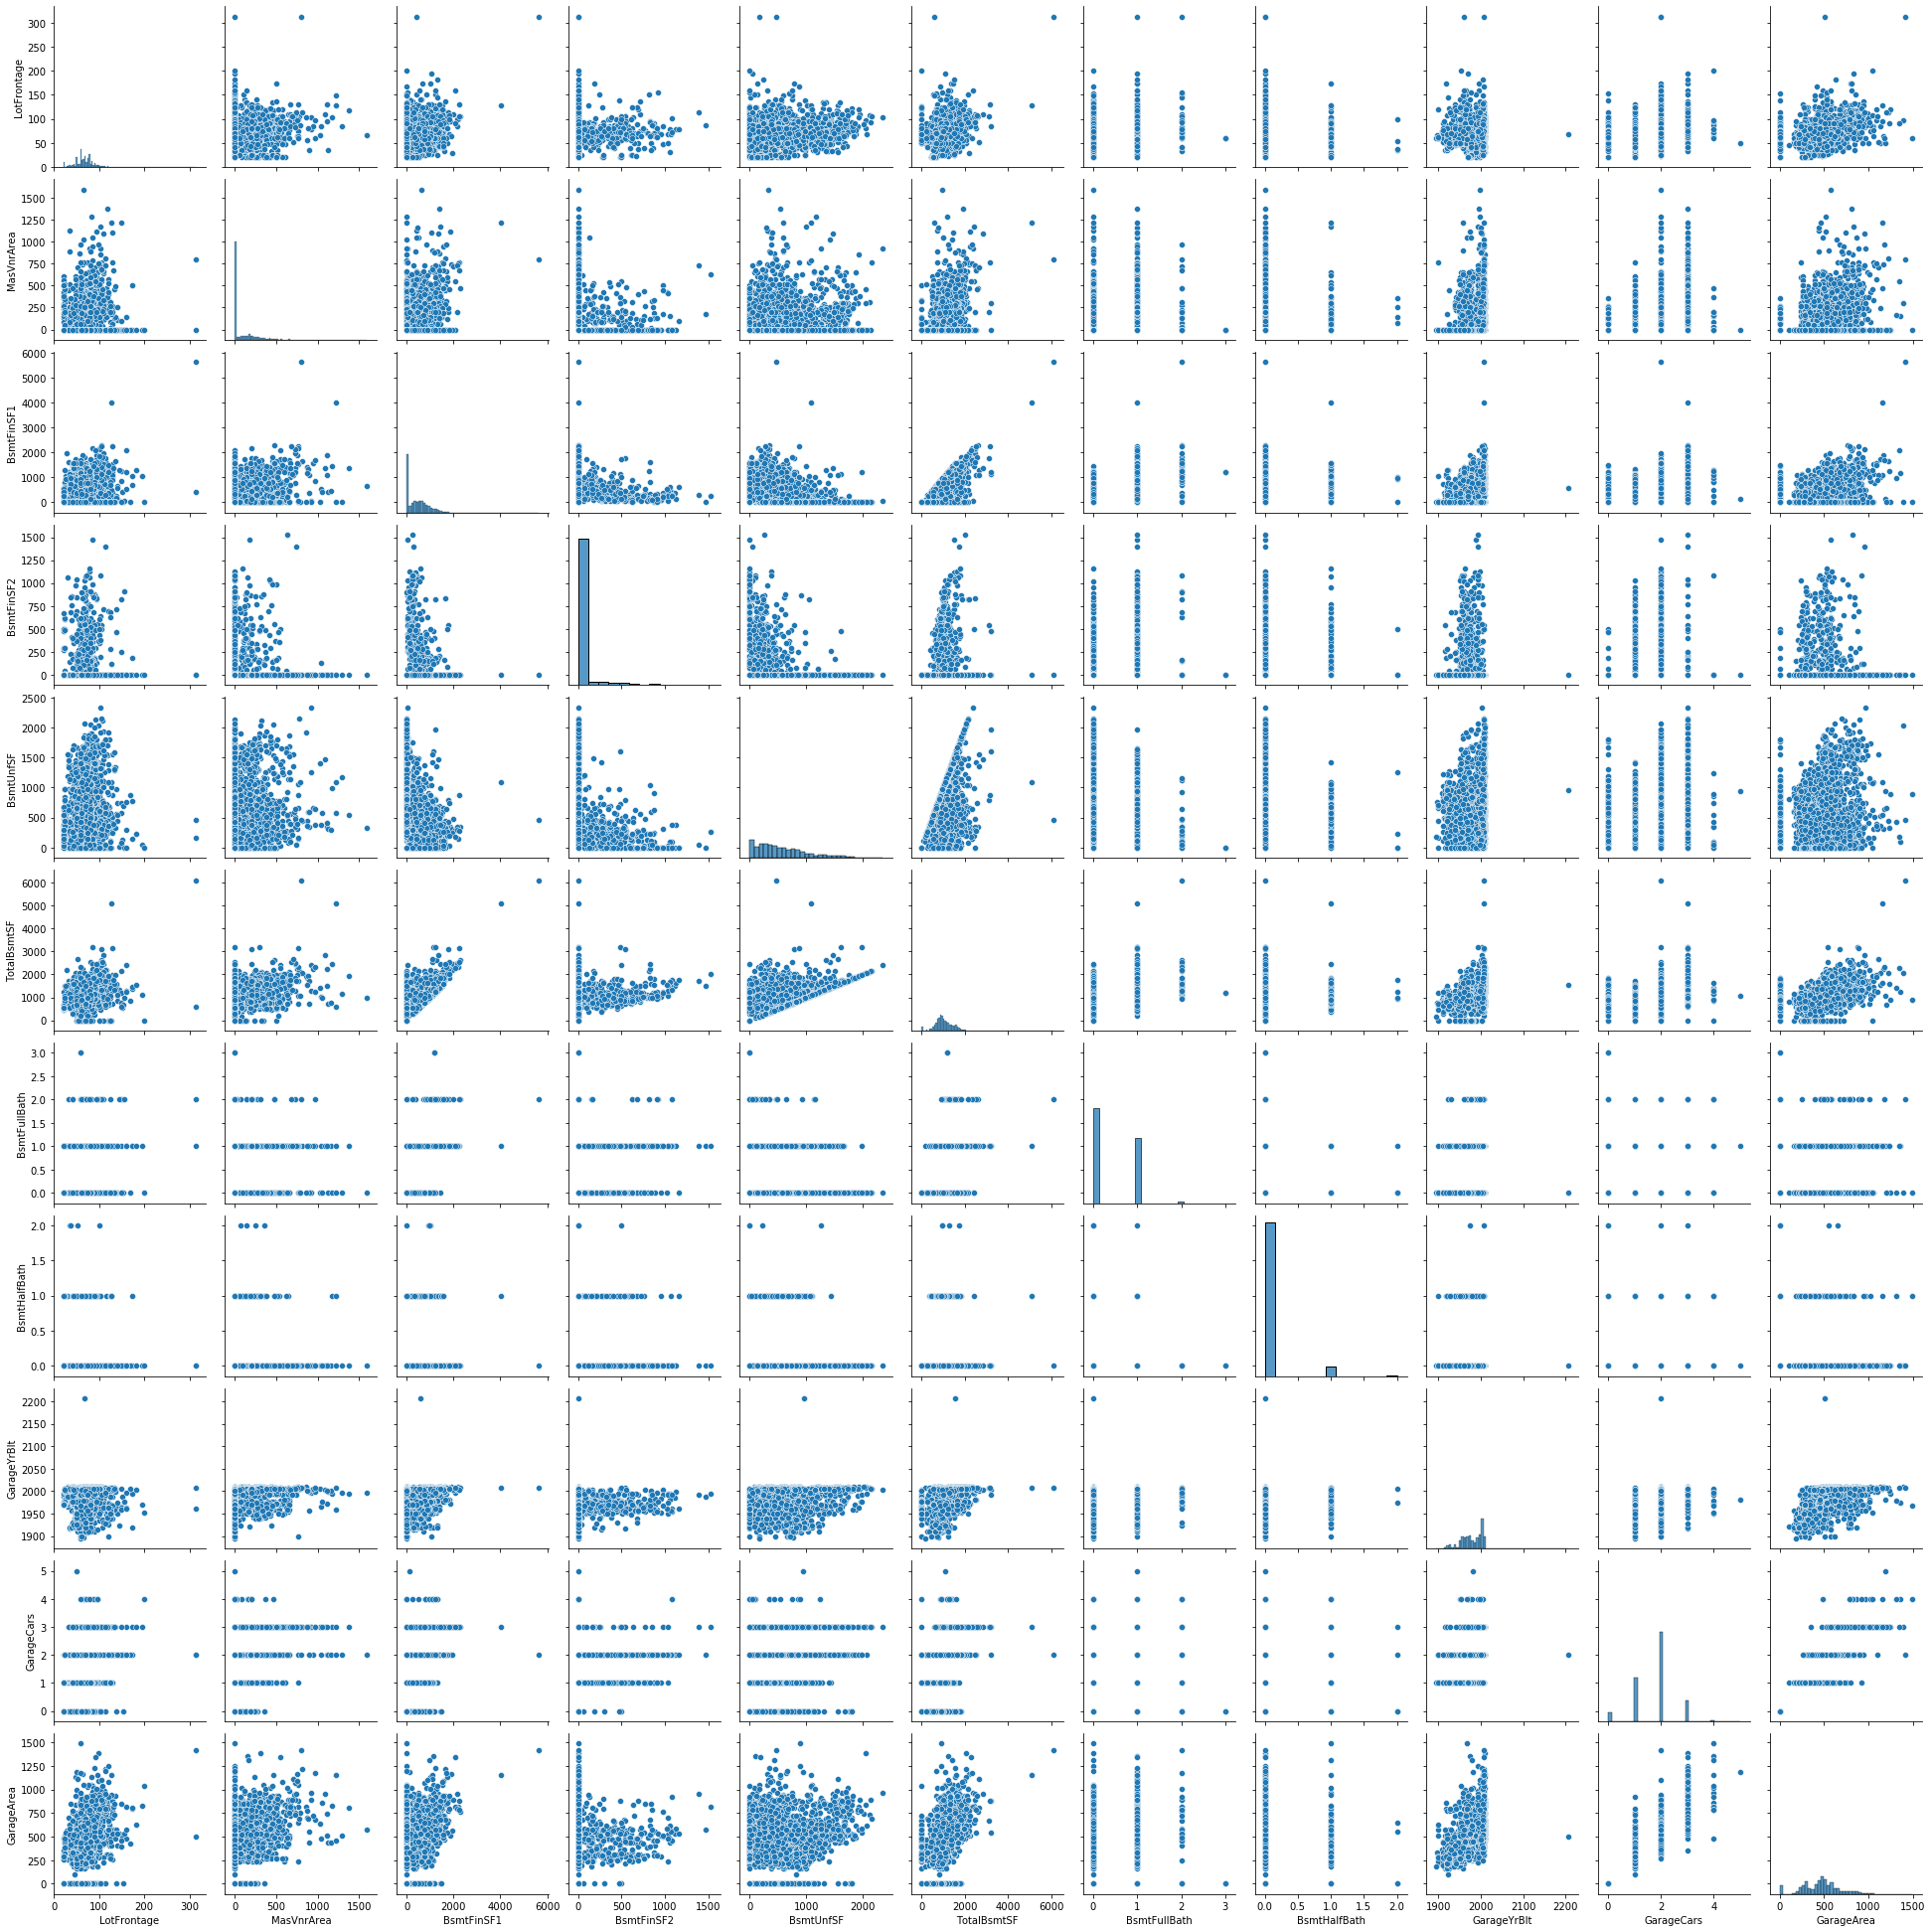

In [6]:
import seaborn as sns

#incomplete_cols.append('SalePrice')
#print(incomplete_cols)

sns.pairplot(all_feats[incomplete_cols])
plt.show()

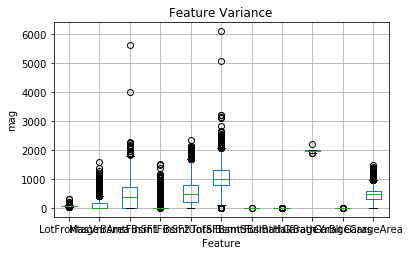

<Figure size 432x288 with 0 Axes>

In [8]:
############ Dsitribution
from matplotlib.patches import Polygon

fig_bp = plt.figure()
fig_bp.subplots_adjust(top=0.8)
fig.set_figwidth(5)
fig.set_figheight(5)
ax_bp = fig_bp.add_subplot(111)
incomplete_data.boxplot(fontsize=10,ax=ax_bp)
ax_bp.set_xticklabels(incomplete_cols)
ax_bp.set_title('Feature Variance')
ax_bp.set_xlabel('Feature')
ax_bp.set_ylabel('mag')
plt.show()

means = []
sd = []

for col in incomplete_cols:
    means.append(incomplete_data[col].mean())
    sd.append(incomplete_data[col].std())
    
fig_avg = plt.figure()

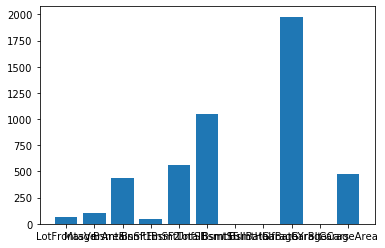

In [10]:
########## Feature Mean
means = []
sd = []

for col in incomplete_cols:
    means.append(incomplete_data[col].mean())
    sd.append(incomplete_data[col].std())
    
fig_avg = plt.figure()
plt.bar(incomplete_cols,means)
plt.show()

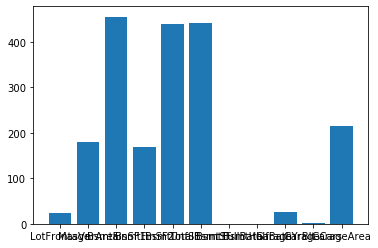

In [12]:
########## Feature Standard Deviation

fig_sd = plt.figure()
plt.bar(incomplete_cols,sd)
plt.show()

In [13]:
############ Mean Imputation
for col in incomplete_cols:
    all_feats[col].fillna(value=all_feats[col].mean, inplace=True)

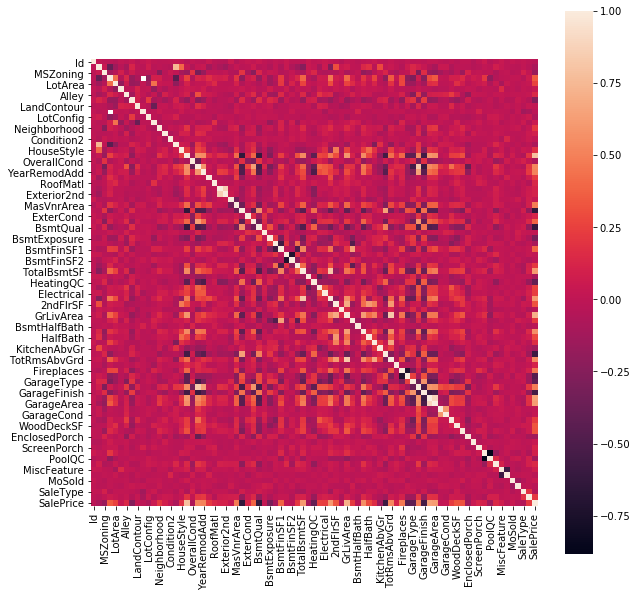

In [14]:
############ Correlation and P Test
corr = train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,square=True)

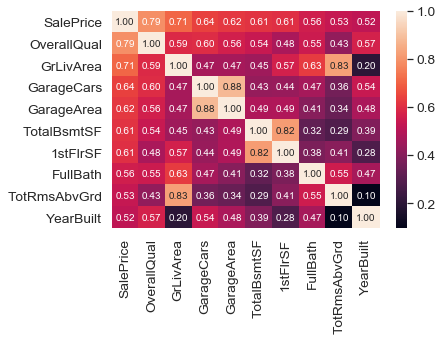

In [15]:
############ Drop Data

n = 10
top_cols = corr.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[top_cols].values.T)

sns.set(font_scale=1.25)
heatmap = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=top_cols.values, xticklabels=top_cols.values)
plt.show()

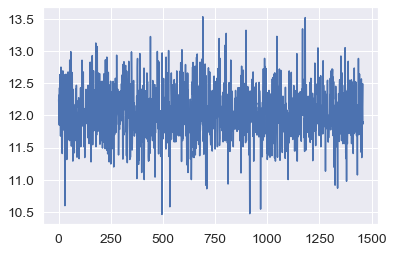

In [16]:
############ Check for Normality
# Log transform the target for official scoring
y_train = np.log1p(y_train)
plt.plot(y_train)

In [32]:
from sklearn.model_selection import train_test_split

x_lin = all_feats[top_cols[1:]]
x_lin_train, x_lin_test, y_lin_train, y_lin_test = train_test_split(x_lin, y_train, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [2919, 1460]

In [22]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
#regr.fit(x_train,y_train)
print(type(y_train))

<class 'pandas.core.series.Series'>
